In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import re,os,sys
import pickle
from matplotlib import ticker, cm
#mpl.rcParams['mathtext.fontset'] = 'cm'
#import matplotlib
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [2]:
# Define the path to get to library with functions libs

# Use this for Windows
#pathtolibs=os.path.dirname(os.getcwd())+'\\libs' 

# Use this for MAC
pathtolibs=os.path.dirname(os.getcwd())+'/libs' 

sys.path.insert(1, pathtolibs)

# Import previously defined functions by Rob
import tbt
#import tbtFit
import svd_clean
import tbtfunctions
import tunespace

In [3]:
# Import relevant tune scans from 02/22/2022
hscan = tunespace.scan_data('CG_11282022_scanh.dat',normalize = 'byI(t)', filter_type = 'butter')
vscan = tunespace.scan_data('CG_11282022_scanv.dat',normalize = 'byI(t)', filter_type = 'butter')

In [4]:
hscan.build_contour_data()
vscan.build_contour_data()
xnew = np.arange(25.31, 25.47, 3e-4)
ynew = np.arange(24.31, 24.47, 3e-4)
xnew,ynew = np.meshgrid(xnew,ynew)
fullinterp = hscan.contour_interp((xnew,ynew)) + vscan.contour_interp((xnew,ynew))
for i in range(fullinterp.shape[0]):
    fullinterp[i,fullinterp[i,:]>0]=-1e-5

In [5]:
def resonance_line(mx = 1, my = 1, p = 1, qxmin = 0, qxmax = 1, qymin = 0, qymax = 1):
    
    if (mx == 0 and my != 0):
        nux = np.linspace(qxmin, qxmax, 100)
        nuy = p/my*np.ones(len(nux))
    
    elif (my == 0 and mx != 0):
        nuy = np.linspace(qymin, qymax, 100)
        nux = p/mx*np.ones(len(nuy))
        
    elif (mx == 0 and my == 0):
        #print('Trivial Case')
        nux = ()
        nuy = ()
        
    elif(my != 0 or mx != 0): 
        nux = np.linspace(qxmin, qxmax, 100)
        nuy = p/my*np.ones(len(nux)) - (mx/my)*nux
    
    #print(mx, my, p)
    return nux,nuy

/var/folders/3d/pnyvn_yx0v76lxfnqkf1vt1r0000j7/T/ipykernel_95751/3780626456.py:98: UserWarning: Log scale: values of z <= 0 have been masked
  cf = ax.contourf(-fullinterp,extent=(25.31,25.47,24.31,24.47),


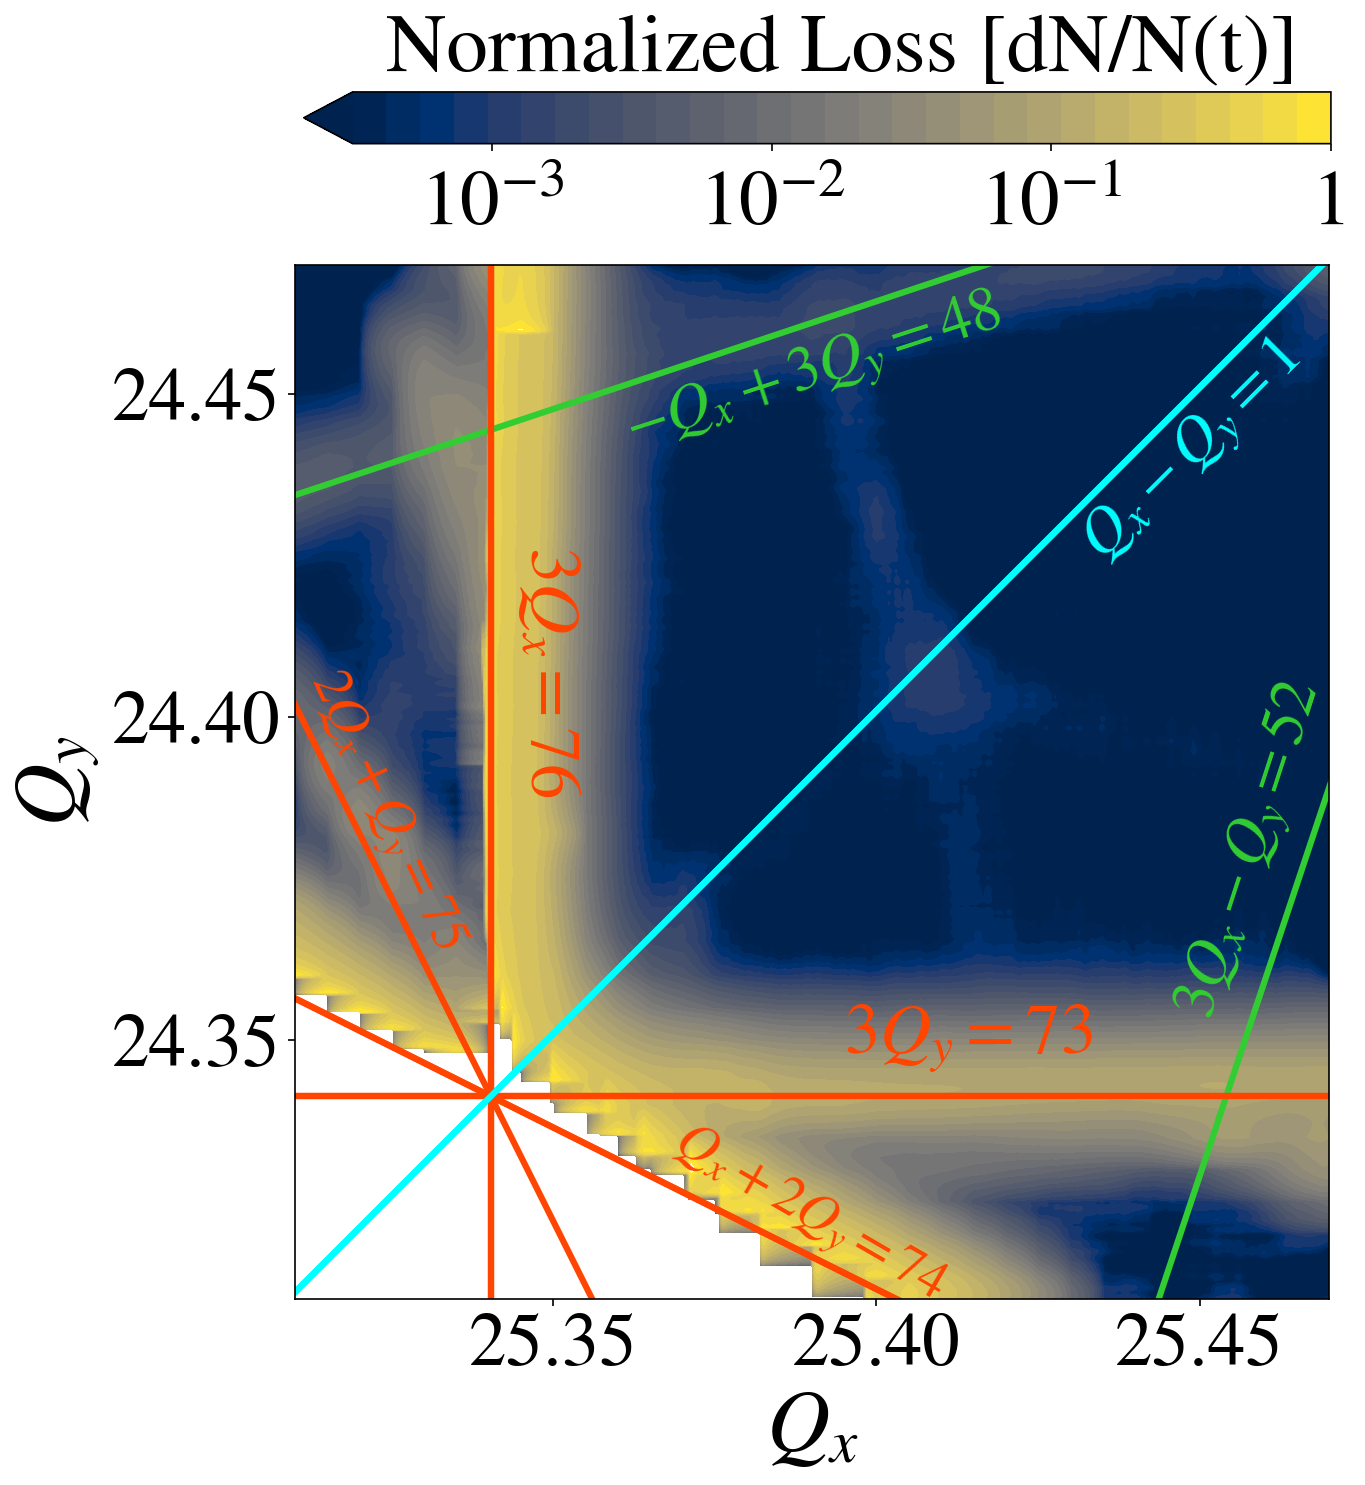

In [36]:
fig,(axb,ax) = plt.subplots(2,1, figsize = (10,10),gridspec_kw={'height_ratios': [0.25,5]})

p = np.arange(0, 200)
order = [4,3,2,1]

color = ['blue', 'brown', 'cyan', 'orangered', 'limegreen', 'yellow', 'gold', 'pink', 'bisque']

shiftx = 0.007
shifty = 0.008

for o in order:
    for pi in p:
        mxx = np.arange(-o, o+1)
        myy = np.arange(-o, o+1)

        for mxi in mxx:
            for myi in myy:
                if ((np.abs(mxi)+np.abs(myi)) <= o and ((np.abs(mxi)+np.abs(myi))!=0)):
                    
                    if ((np.abs(mxi)+np.abs(myi))==3):
                        if (mxi%2==0):
                            nuxi, nuyi = resonance_line(mx = mxi, my = myi, p = pi, 
                                                qxmin = 25, qxmax = 26, qymin = 24, qymax = 25)
                            ax.plot(nuxi+shiftx, nuyi+shifty, c = color[(np.abs(mxi)+np.abs(myi))], 
                                    label = 'Skew %d'%(np.abs(mxi)+np.abs(myi)), linewidth = 3)
                        
                        else:
                            nuxi, nuyi = resonance_line(mx = mxi, my = myi, p = pi, 
                                                qxmin = 25, qxmax = 26, qymin = 24, qymax = 25)
                            ax.plot(nuxi+shiftx, nuyi+shifty, c = color[(np.abs(mxi)+np.abs(myi))], 
                                    label = 'Normal %d'%(np.abs(mxi)+np.abs(myi)), linewidth = 3)
                    
                    elif ((np.abs(mxi)+np.abs(myi))==5):
                        nuxi, nuyi = resonance_line(mx = mxi, my = myi, p = pi,
                                                    qxmin = 25, qxmax = 26, qymin = 24, qymax = 25)
                        ax.plot(nuxi+shiftx, nuyi+shifty, c = color[(np.abs(mxi)+np.abs(myi))], 
                                label = 'Order %d'%(np.abs(mxi)+np.abs(myi)), linewidth = 3)
                    
                    elif ((np.abs(mxi)+np.abs(myi))==4):
                        if((np.abs(mxi)==2) & (np.abs(myi)==2)):
                            break
                        
                        nuxi, nuyi = resonance_line(mx = mxi, my = myi, p = pi,
                                                    qxmin = 25, qxmax = 26, qymin = 24, qymax = 25)
                        ax.plot(nuxi+shiftx, nuyi, c = color[(np.abs(mxi)+np.abs(myi))], 
                                label = 'Order %d'%(np.abs(mxi)+np.abs(myi)), linewidth = 3)
                    
                    else:    
                        nuxi, nuyi = resonance_line(mx = mxi, my = myi, p = pi, 
                                                qxmin = 25, qxmax = 26, qymin = 24, qymax = 25)
                        ax.plot(nuxi+shiftx, nuyi+shifty, c = color[(np.abs(mxi)+np.abs(myi))], 
                                label = 'Order %d'%(np.abs(mxi)+np.abs(myi)), linewidth = 3)

                        
ax.annotate(text = r'$3 Q_x = 76$', xy = (25.344,24.39), xycoords = 'data', 
            rotation = -90, fontsize = 34, color = 'orangered')

ax.annotate(text = r'$3 Q_y = 73$', xy = (25.395,24.348), xycoords = 'data', 
            rotation = 'horizontal', fontsize = 34, color = 'orangered')

ax.annotate(text = r'$Q_x + 2 Q_y = 74$', xy = (25.367,24.310), xycoords = 'data', 
            rotation = -30, fontsize = 26, color = 'orangered')

ax.annotate(text = r'$2 Q_x + Q_y = 75$', xy = (25.31,24.365), xycoords = 'data', 
            rotation = -65, fontsize = 26, color = 'orangered')

ax.annotate(text = r'$Q_x - Q_y= 1$', xy = (25.43,24.425), xycoords = 'data', 
            rotation = 45, fontsize = 30, color = 'cyan')

ax.annotate(text = r'$-Q_x+3 Q_y = 48$', xy = (25.36,24.442), xycoords = 'data', 
            rotation = 18, fontsize = 30, color = 'limegreen')

ax.annotate(text = r'$3Q_x - Q_y = 52$', xy = (25.445,24.355), xycoords = 'data', 
            rotation = 90-18, fontsize = 30, color = 'limegreen')

                        
# ax.annotate(text = r'$3 Q_x = 76$', xy = (25.33,24.42), xycoords = 'data', 
#             rotation = 'vertical', fontsize = 45, color = 'yellow')

# ax.annotate(text = r'$3 Q_y = 73$', xy = (25.42,24.345), xycoords = 'data', 
#             rotation = 'horizontal', fontsize = 45, color = 'yellow')

# ax.annotate(text = r'$Q_x + 2 Q_y = 74$', xy = (25.36,24.32), xycoords = 'data', 
#             rotation = -30, fontsize = 45, color = 'yellow')

# ax.annotate(text = r'$2 Q_x + Q_y = 75$', xy = (25.315,24.365), xycoords = 'data', 
#             rotation = -65, fontsize = 45, color = 'yellow')

# ax.annotate(text = r'$5Q_x  = 127$', xy = (25.408,24.42), xycoords = 'data', 
#             rotation = 'vertical', fontsize = 45, color = 'orangered')

# ax.annotate(text = r'$Q_x - Q_y= 1$', xy = (25.378,24.3675), xycoords = 'data', 
#             rotation = 45, fontsize = 45, color = 'magenta')

#ax.set_title('Tune Map for FNAL Recycler', fontsize = 25)
levs = np.logspace(-3.5,0,num = 30)
#levs = np.linspace(0,0.1,1000)
cf = ax.contourf(-fullinterp,extent=(25.31,25.47,24.31,24.47),
                 locator=ticker.LogLocator(numticks=10),
                 levels=levs,cmap = 'cividis',extend = 'min')

ax.set_xlabel('$Q_x$',fontsize=42)
ax.set_ylabel('$Q_y$',fontsize=42)


ax.set_xticks([25.30,25.35,25.40,25.45])
ax.set_xticklabels(['25.30','25.35','25.40','25.45'],fontsize = 36)

ax.set_yticks([24.30,24.35,24.40,24.45])
ax.set_yticklabels(['24.30','24.35','24.40','24.45'], fontsize = 36)

ax.set_xlim((25.31,25.47))
ax.set_ylim((24.31,24.47))


# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(cf, cax=axb, ticks=np.logspace(-3,0,num = 4),location = 'top')
#cbar = fig.colorbar(cf)
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.tick_params(axis = 'x', pad = 10)
cbar.ax.set_xticklabels([r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', '1'],fontsize = 38)
cbar.ax.set_xlabel('Normalized Loss [dN/N(t)]', fontsize = 40,labelpad = 10)

plt.subplots_adjust(hspace = .2)
ax.set_aspect('equal','box')
axb.set_aspect(0.185)


fig.set_dpi(150)
fig.patch.set_facecolor('white')
plt.tight_layout()

plt.savefig('bare_comments.pdf')

plt.show()
plt.close()